In [3]:
!pip install trimesh numpy matplotlib

Defaulting to user installation because normal site-packages is not writeable


unable to use sparse matrix, falling back!
Traceback (most recent call last):
  File "/home/breynerciro/.local/lib/python3.13/site-packages/trimesh/geometry.py", line 386, in weighted_vertex_normals
    return util.unitize(summed_sparse())
                        ~~~~~~~~~~~~~^^
  File "/home/breynerciro/.local/lib/python3.13/site-packages/trimesh/geometry.py", line 360, in summed_sparse
    matrix = index_sparse(vertex_count, faces, data=face_angles.ravel())
  File "/home/breynerciro/.local/lib/python3.13/site-packages/trimesh/geometry.py", line 462, in index_sparse
    return scipy.sparse.coo_matrix((data, (row, col)), shape=shape, dtype=data.dtype)
           ^^^^^^^^^^^^
  File "/home/breynerciro/.local/lib/python3.13/site-packages/trimesh/exceptions.py", line 35, in __getattribute__
    raise exc_type(*exc_args)
ModuleNotFoundError: No module named 'scipy'


🌸 Cargando modelo magnolia.obj...
📊 Propiedades del modelo:
  formato: .obj
  num_vertices: 806
  num_caras: 1372
  tiene_normales: True
  tiene_texturas: False
  tiene_materiales: False
  vertices_duplicados: False
  volumen: 6054.992258242001
  centro_masa: [2.295377918098885, -15.25858214670123, -0.15199704579439546]


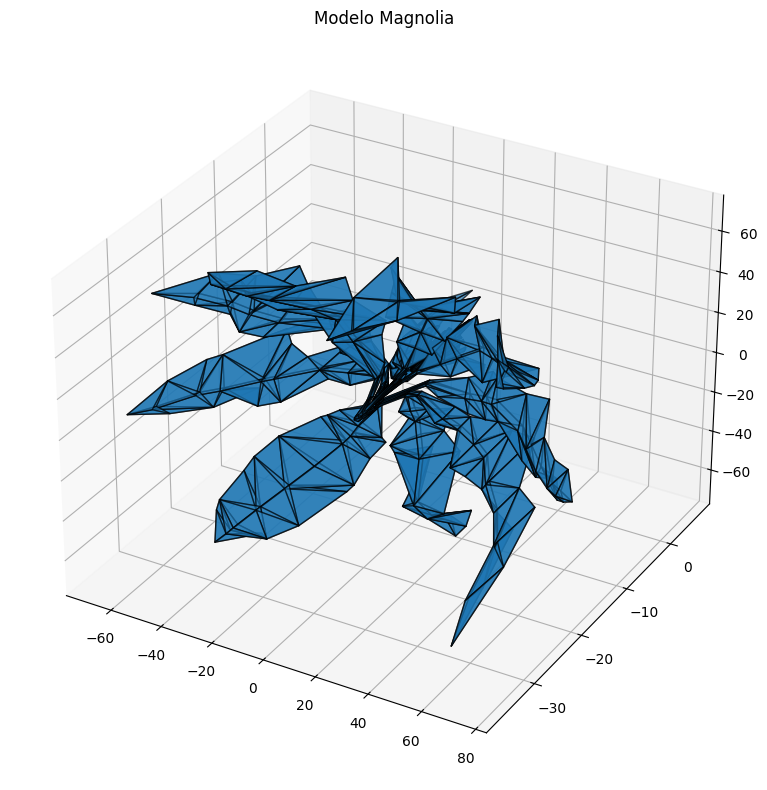

unable to use sparse matrix, falling back!
Traceback (most recent call last):
  File "/home/breynerciro/.local/lib/python3.13/site-packages/trimesh/geometry.py", line 386, in weighted_vertex_normals
    return util.unitize(summed_sparse())
                        ~~~~~~~~~~~~~^^
  File "/home/breynerciro/.local/lib/python3.13/site-packages/trimesh/geometry.py", line 360, in summed_sparse
    matrix = index_sparse(vertex_count, faces, data=face_angles.ravel())
  File "/home/breynerciro/.local/lib/python3.13/site-packages/trimesh/geometry.py", line 462, in index_sparse
    return scipy.sparse.coo_matrix((data, (row, col)), shape=shape, dtype=data.dtype)
           ^^^^^^^^^^^^
  File "/home/breynerciro/.local/lib/python3.13/site-packages/trimesh/exceptions.py", line 35, in __getattribute__
    raise exc_type(*exc_args)
ModuleNotFoundError: No module named 'scipy'


✅ Modelo convertido y guardado en: magnolia_convertido.stl
✅ Modelo convertido y guardado en: magnolia_convertido.gltf

=== 🧠 COMPARACIÓN DE MODELOS ===
Propiedad            | magnolia.obj   
-------------------------------------
formato              | .obj           
num_vertices         | 806            
num_caras            | 1372           
tiene_normales       | True           
tiene_texturas       | False          
tiene_materiales     | False          
vertices_duplicados  | False          


In [5]:
import trimesh
import numpy as np
import os
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from mpl_toolkits.mplot3d.art3d import Poly3DCollection

def load_and_analyze_model(file_path):
    """
    Carga un modelo 3D (ya sea Trimesh o Scene) y analiza sus propiedades.
    """
    loaded = trimesh.load(file_path)

    # Si es una escena, obtenemos la geometría combinada
    if isinstance(loaded, trimesh.Scene):
        if not loaded.geometry:
            raise ValueError("La escena no contiene geometría")
        mesh = trimesh.util.concatenate(tuple(loaded.geometry.values()))
    else:
        mesh = loaded

    properties = {
        "formato": os.path.splitext(file_path)[1],
        "num_vertices": len(mesh.vertices),
        "num_caras": len(mesh.faces),
        "tiene_normales": mesh.vertex_normals is not None,
        "tiene_texturas": hasattr(mesh.visual, 'uv') and mesh.visual.uv is not None,
        "tiene_materiales": hasattr(mesh.visual, 'material') and mesh.visual.material is not None,
        "vertices_duplicados": len(mesh.vertices) != len(np.unique(mesh.vertices, axis=0)),
        "volumen": mesh.volume,
        "centro_masa": mesh.center_mass.tolist() if hasattr(mesh, 'center_mass') else None,
    }

    return mesh, properties


def convert_format(mesh, output_path, format_type=None):
    """
    Convierte un modelo a otro formato
    """
    if format_type is None:
        format_type = os.path.splitext(output_path)[1][1:]

    if format_type.lower() == 'obj':
        mesh.export(output_path, file_type='obj')
    elif format_type.lower() == 'stl':
        mesh.export(output_path, file_type='stl')
    elif format_type.lower() in ['gltf', 'glb']:
        mesh.export(output_path, file_type=format_type.lower())
    else:
        raise ValueError(f"Formato {format_type} no soportado")

    print(f"✅ Modelo convertido y guardado en: {output_path}")

def visualize_mesh(mesh, title="Modelo 3D"):
    """
    Visualiza un modelo 3D usando matplotlib
    """
    fig = plt.figure(figsize=(10, 8))
    ax = fig.add_subplot(111, projection='3d')

    vertices = mesh.vertices
    faces = mesh.faces

    mesh_collection = Poly3DCollection([vertices[face] for face in faces[:1000]], alpha=0.7, edgecolor='k')
    ax.add_collection3d(mesh_collection)

    all_vertices = np.array(vertices)
    ax.set_xlim(all_vertices[:, 0].min(), all_vertices[:, 0].max())
    ax.set_ylim(all_vertices[:, 1].min(), all_vertices[:, 1].max())
    ax.set_zlim(all_vertices[:, 2].min(), all_vertices[:, 2].max())

    ax.set_title(title)
    plt.tight_layout()
    plt.show()

def compare_models(model_paths):
    """
    Compara varios modelos 3D y muestra sus propiedades
    """
    results = []

    for path in model_paths:
        mesh, properties = load_and_analyze_model(path)
        results.append({
            'path': path,
            'mesh': mesh,
            'properties': properties
        })

    print("\n=== 🧠 COMPARACIÓN DE MODELOS ===")
    print(f"{'Propiedad':<20} | " + " | ".join([f"{os.path.basename(r['path']):<15}" for r in results]))
    print("-" * (20 + 17 * len(results)))

    for prop in ['formato', 'num_vertices', 'num_caras', 'tiene_normales',
                 'tiene_texturas', 'tiene_materiales', 'vertices_duplicados']:
        print(f"{prop:<20} | " + " | ".join([f"{str(r['properties'].get(prop, 'N/A')):<15}" for r in results]))

    return results

# === 🚀 USO PRINCIPAL ===
if __name__ == "__main__":
    # Usamos el modelo llamado "magnolia.obj"
    model_obj = "magnolia.obj"

    print("🌸 Cargando modelo magnolia.obj...")
    try:
        mesh_obj, prop_obj = load_and_analyze_model(model_obj)
        print("📊 Propiedades del modelo:")
        for key, value in prop_obj.items():
            print(f"  {key}: {value}")

        visualize_mesh(mesh_obj, "Modelo Magnolia")

        # Conversión del modelo
        convert_format(mesh_obj, "magnolia_convertido.stl")
        convert_format(mesh_obj, "magnolia_convertido.gltf")

    except Exception as e:
        print(f"❌ Error al procesar el modelo magnolia.obj: {e}")

    # Comparación de modelos (solo el magnolia en este caso)
    try:
        modelos_a_comparar = ["magnolia.obj"]
        resultados = compare_models(modelos_a_comparar)
    except Exception as e:
        print(f"❌ Error al comparar modelos: {e}")

